In [1]:
import matplotlib.pyplot as plt
from prep_terrain_data import makeTerrainData
from class_vis import prettyPicture
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier

In [2]:
features_train, labels_train, features_test, labels_test = makeTerrainData()

In [3]:
### the training data (features_train, labels_train) have both "fast" and "slow"
### points mixed together--separate them so we can give them different colors
### in the scatterplot and identify them visually
grade_fast = [features_train[ii][0] for ii in range(0, len(features_train)) if labels_train[ii]==0]
bumpy_fast = [features_train[ii][1] for ii in range(0, len(features_train)) if labels_train[ii]==0]
grade_slow = [features_train[ii][0] for ii in range(0, len(features_train)) if labels_train[ii]==1]
bumpy_slow = [features_train[ii][1] for ii in range(0, len(features_train)) if labels_train[ii]==1]

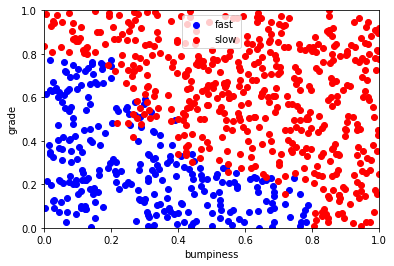

In [4]:
#### initial visualization
plt.xlim(0.0, 1.0)
plt.ylim(0.0, 1.0)
plt.scatter(bumpy_fast, grade_fast, color = "b", label="fast")
plt.scatter(grade_slow, bumpy_slow, color = "r", label="slow")
plt.legend()
plt.xlabel("bumpiness")
plt.ylabel("grade")
plt.show()
################################################################################

Testes com KNN
Score:  94.0 %


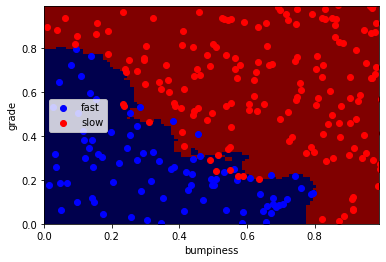

In [22]:
# Testes com o KNN
clf = KNeighborsClassifier(n_neighbors=8, weights='distance')
clf.fit(features_train, labels_train)
print('Testes com KNN')
print("Score: ", round(clf.score(features_test, labels_test)*100,2),"%")
try:
    prettyPicture(clf, features_test, labels_test)
except NameError:
    pass

Testes com AdaBoost
Score:  92.4 %


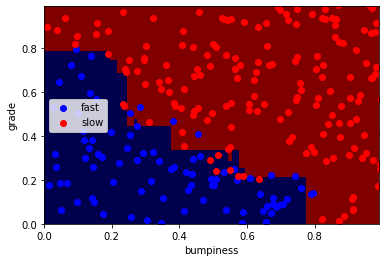

In [34]:
# Testes com o Adaboost
clf = AdaBoostClassifier(learning_rate=1.0, n_estimators=50)
clf.fit(features_train, labels_train)
print('Testes com AdaBoost')
print("Score: ", round(clf.score(features_test, labels_test)*100,2),"%")
try:
    prettyPicture(clf, features_test, labels_test)
except NameError:
    pass

Testes com Random Forest
Score:  92.0 %


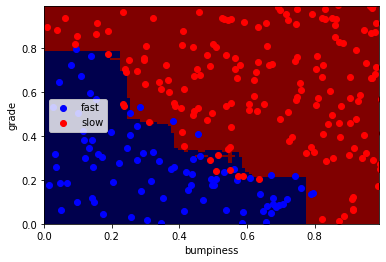

In [65]:
# Testes com o Random Forest
clf = RandomForestClassifier(n_estimators=200, criterion='entropy', max_depth=80, min_samples_leaf=2, n_jobs=1)
clf.fit(features_train, labels_train)
print('Testes com Random Forest')
print("Score: ", round(clf.score(features_test, labels_test)*100,2),"%")
try:
    prettyPicture(clf, features_test, labels_test)
except NameError:
    pass